In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [18]:
df = pd.read_csv('final_dataset.csv')

In [19]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [20]:
df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [21]:
X =df['Ozone']
y= df['AQI']

In [22]:
X.head()

0    43.19
1    16.43
2    44.29
3    49.19
4    48.88
Name: Ozone, dtype: float64

In [23]:
y.head()

0    462
1    482
2    263
3    207
4    149
Name: AQI, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

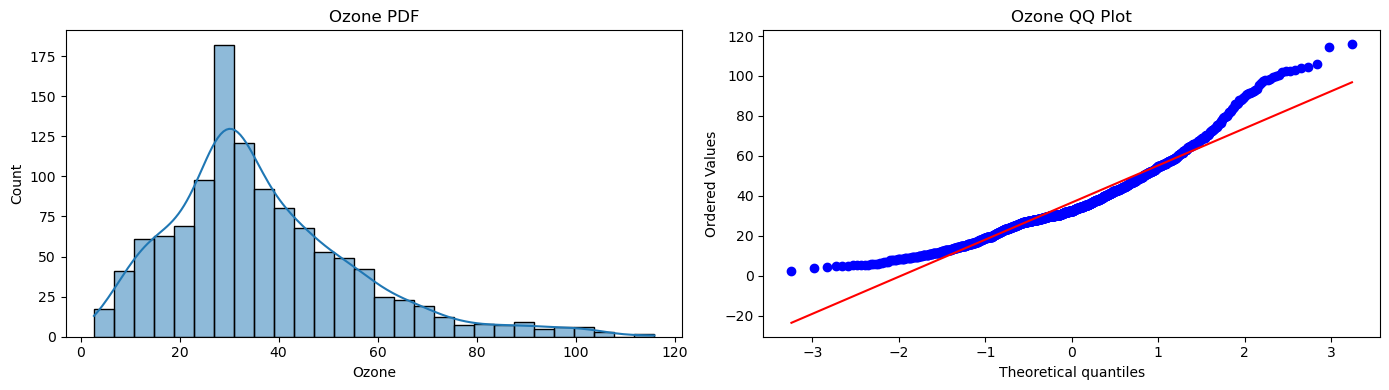

In [25]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.histplot(X_train, kde=True)
plt.title('Ozone PDF')

plt.subplot(122)
stats.probplot(X_train, dist="norm", plot=plt)
plt.title('Ozone QQ Plot')

plt.tight_layout()
plt.show()

In [26]:
x1 =df['CO']
y1= df['Days']

In [27]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

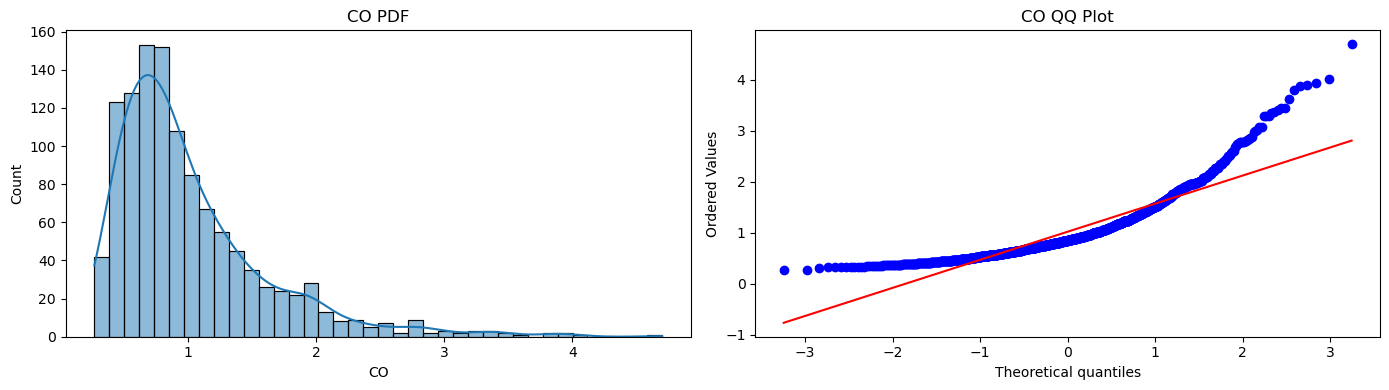

In [28]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.histplot(x1_train, kde=True)
plt.title('CO PDF')

plt.subplot(122)
stats.probplot(x1_train, dist="norm", plot=plt)
plt.title('CO QQ Plot')

plt.tight_layout()
plt.show()

In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [30]:
clf.fit(x1_train.to_frame(), y1_train)
clf2.fit(x1_train.to_frame(), y1_train)

y1_pred = clf.predict(x1_test.to_frame())
y1_pred1 = clf2.predict(x1_test.to_frame())

print("Accuracy LR", accuracy_score(y1_test, y1_pred))
print("Accuracy DT", accuracy_score(y1_test, y1_pred1))

Accuracy LR 0.12286689419795221
Accuracy DT 0.1296928327645051


log function to improve the accurarcy

In [31]:
trf = FunctionTransformer(func=np.log1p)


x1_train_transformed = trf.fit_transform(x1_train)
x1_test_transformed = trf.transform(x1_test)

In [33]:
clf.fit(x1_train.to_frame(), y1_train)
clf2.fit(x1_train.to_frame(), y1_train)

y1_pred = clf.predict(x1_test.to_frame())
y1_pred1 = clf2.predict(x1_test.to_frame())

print("Accuracy LR", accuracy_score(y1_test, y1_pred))
print("Accuracy DT", accuracy_score(y1_test, y1_pred1))

Accuracy LR 0.12286689419795221
Accuracy DT 0.1296928327645051


acuaracy is poor because , poor data choice , which led poor , result....